<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT23/blob/main/Lab6/reinisfreibergs_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6: optimization and learning
**Reinis Freibergs**

# **Abstract**

In this lab assignment the goal is to implement and test methods for finding the critical points of functions by the use of gradients. The gradient descent and Newton's methods are tested, and both show successful convergence for their respective test functions.


# **About the code**

In [121]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""


# Author: Reinis Freibergs, 2023

# Based on a template:
# Copyright (C) 2023 Johan Hoffman (jhoffman@kth.se)


# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [122]:
# Load neccessary modules.
#from google.colab import files

import numpy as np
import matplotlib.pyplot as plt

# **Introduction**

Gradient descent method finds the critical point of a function by searching in the direction opposite to the gradient. Since gradient describes the direction in which the function grows the fastest at the current point, then stepping in the opposite direction provides the direction with the steepest decline. The update formula for this method is given by:

$$x^{(k+1)} = x^{(k)} - \alpha^{(k)}\nabla f(x^{(k)})$$

Where $\alpha$ is the step length. This directly follows from the Taylor's expansion:

$$f(x+\nabla x) - f(x) = \nabla f(x)^T \Delta x + \mathcal{O}(\Delta x^2)$$

Since the sharpest decrease results from lowest $\nabla f(x)$ values.

The step length $\alpha$ is calculated by a line search method, which minimizes the function along a direction $f(s) = f(x^{(k)} - s\nabla f((x^{(k)})))$ inside a specific starting interval by repetitively shrinking the target interval.

The Newtons method is similar, with the difference being the use of second order derivatives. Its update formula is given by:

$$x^{(k+1)} = x^{(k)} - (Hf(x^{(k)}))^{-1} \nabla f(x^{(k)})$$

where $H$ is the Hessian matrix.

# **Methods**

### Gradient descent method

In this case the golden-section search is used as the line search method, which divides the segments in each iteration by a factor $\phi = \frac{1 + \sqrt{5}}{2}$, known as the golden ratio. 

The derivatives for the gradient are calculated with a central difference scheme.

In [123]:
def compute_gradient(f, x):
    # central difference
    return (f(x+0.01) - f(x-0.01))/(2*0.01)


def line_search(f, x, Df):
    gr = (np.sqrt(5) + 1) / 2
    a = 0
    b = 1
    
    # could use some tolerance criterion
    # currently searches till constant interval
    for i in range(10):
        c = b - (b - a) / gr
        d = a + (b - a) / gr
        if f(x - c*Df) < f(x - d*Df): 
            b = d
        else:
            a = c

    return a if f(a) < f(b) else b

def gradient_descent(f, x0, exact_min):
    solution_list = []
    Df = 10
    x = x0
    iterations = 0
    while abs(Df) > 0.00001 or iterations > 1000:
        Df = compute_gradient(f, x)
        alpha = line_search(f, x, Df)
        x = x - alpha * Df
        solution_list.append(np.abs(x - exact_min))
        iterations += 1
        
    return x, solution_list

### Newtons method

For this function the gradient and Hessian matrix will be passed into the function, but could as well be calculated with similar finite difference schemes as in previous task. The implementation is directly based on algorithm 15.3.


In [124]:
def newtons_method(f, x0, gradient, hessian_inverse, exact_min):
    solution_list = []
    x = x0
    Df = gradient(x)
    iterations = 0
    while np.linalg.norm(np.array(Df))> 0.00001 and iterations < 1000:
        Df = gradient(x)
        Hf = hessian_inverse(x)
        x = x - Hf @ Df
        solution_list.append(np.abs(x - exact_min))
        iterations += 1
        
    return x, solution_list

## Results

### Gradient descent method

The testing is done in $R^1$ with randomized second order polynomials. To ensure the existance of a minimum the $a$ parameter in $ax^2 + bx +c$ is set as positive, whereas $b$ and $c$ are random. Initial guess is constant, which should create a change in the amount of iterations.

Plots indicate the residual when comparing versus the analytical value and how many iterations it took till convergence.

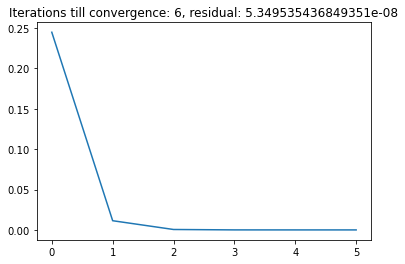

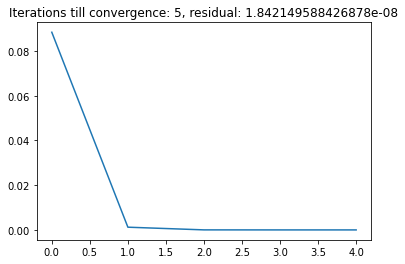

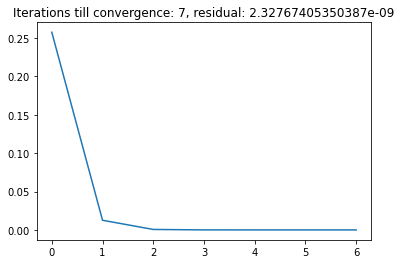

In [125]:
def poly(coefs):
    a, b, c = coefs[0], coefs[1], coefs[2]
    a = abs(a)
    def func(x):
        return a*x**2 + b*x + c
    
    analytical_solution = -b/(2*a)
    
    return func, analytical_solution

for idx in range(3):
    fig, ax = plt.subplots()
    coefs = np.random.uniform(low=-5, high=5, size=3)
    polynomial, exact_sol = poly(coefs)
    x, k = gradient_descent(polynomial, 5, exact_sol)
    ax.set_title(f'Iterations till convergence: {len(k)}, residual: {k[-1]}')
    ax.plot(k)

### Newtons method

The testing is similar as in previous case, but for $R^2$ functions. Here the analytical gradient and Hessian matrices are used.
The test function is set up as $(x_1-a)^2 + (x_2-b)^2$, where $a$ and $b$ are random variables and which has a global minimum in point $(a, b)$. Since the Hessian for this kind of function is a diagonal matrix, the inverse can be easily calculated directly.

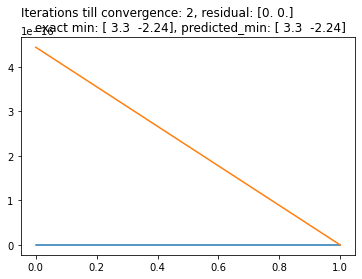

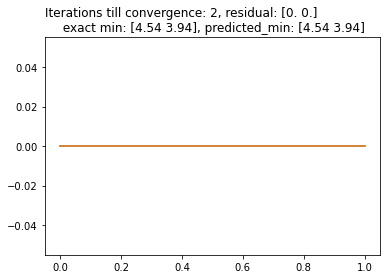

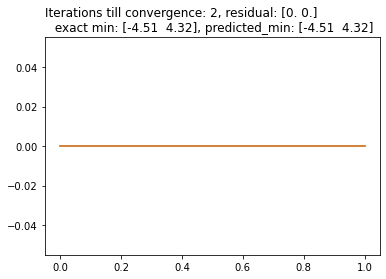

In [127]:
def poly(coefs):
    a, b = coefs[0], coefs[1]
    def func(x):
        return (x[0] - a)**2 + (x[1] - b)**2
    
    def gradient(x):
        return np.array([2*(x[0]-a), 2*(x[1]-b)])
    
    def hessian_inverse(x):
        return np.array([[1/2, 0],
                        [0, 1/2]])
        
        
    analytical_solution = np.array([a, b])
    
    
    return func, gradient, hessian_inverse, analytical_solution


for idx in range(3):
    fig, ax = plt.subplots()
    coefs = np.random.uniform(low=-5, high=5, size=2)
    polynomial, gradient, hessian_inverse, exact_sol = poly(coefs)
    x, k = newtons_method(polynomial, [-5,5], gradient, hessian_inverse, exact_sol)
    ax.set_title(f'Iterations till convergence: {len(k)}, residual: {k[-1]}\
                \n exact min: {np.round(exact_sol,2)}, predicted_min: {np.round(x,2)}')
    ax.plot(k)

# **Discussion**

The test function for the gradient descent of second order polynomials indicates successful convergence already in few iterations. Still, there are many possibilities for further testing - tolerance values for the derivative, line search and the descent algorithm itself, as well as a function with local rather than global minimums.

Similarly for the Newtons method the convergence is reached very quickly, as a matter of fact in 2 iterations for every case, which could be influenced by the use of analytical derivatives. This could also be further challenged with a more 'difficult' function.